<a href="https://colab.research.google.com/github/priyachittamuru/Random_forest/blob/main/Randomforest_credit_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Credit Risk Classification Dataset
\
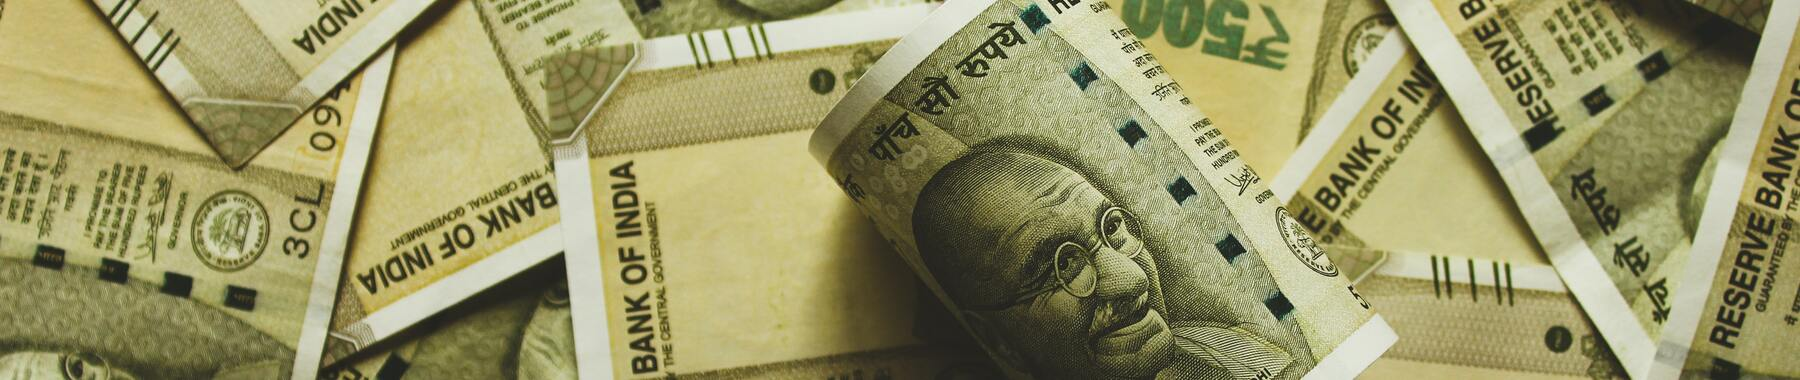

##**Source**:[Kaggle](https://www.kaggle.com/datasets/praveengovi/credit-risk-classification-dataset/data?select=customer_data.csv)
##**Colomns:**
customer_data.csv:
1. customer’s demographic data and category attributes which have been encoded.
2. Category features are fea_1, fea_3, fea_5, fea_6, fea_7, fea_9.
3. label is 1, the customer is in high credit risk
4. label is 0, the customer is in low credit risk

In [50]:
#Importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [25]:
# Load the dataset
data = pd.read_csv('/content/customer_data.csv')

In [26]:
#Printing the dataset
data.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141


In [27]:
##finding the datatypes,colums and rows /information of the data provided
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   1125 non-null   int64  
 1   id      1125 non-null   int64  
 2   fea_1   1125 non-null   int64  
 3   fea_2   976 non-null    float64
 4   fea_3   1125 non-null   int64  
 5   fea_4   1125 non-null   float64
 6   fea_5   1125 non-null   int64  
 7   fea_6   1125 non-null   int64  
 8   fea_7   1125 non-null   int64  
 9   fea_8   1125 non-null   int64  
 10  fea_9   1125 non-null   int64  
 11  fea_10  1125 non-null   int64  
 12  fea_11  1125 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 114.4 KB


➡ The dataset has 1125 rows andd 13 colomns
➡ All the data seems to numerical, no categorial data, and fea_2 has few missing values

In [28]:
#Describe the data
data.describe()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
count,1125.000000,1.125000e+03,1125.000000,976.000000,1125.000000,1.125000e+03,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000
mean,0.200000,5.783677e+07,5.482667,1283.911373,2.333333,1.208836e+05,1.928889,10.872000,4.832889,100.802667,4.195556,164618.495111,134.999004
std,0.400178,1.817150e+06,1.383338,51.764022,0.878773,8.844523e+04,0.257125,2.676437,2.971182,11.988955,0.855679,152520.488281,112.616798
min,0.000000,5.498235e+07,1.000000,1116.500000,1.000000,1.500000e+04,1.000000,3.000000,-1.000000,64.000000,1.000000,60000.000000,1.000000
25%,0.000000,5.499050e+07,4.000000,1244.000000,1.000000,7.200000e+04,2.000000,8.000000,5.000000,90.000000,3.000000,60044.000000,1.000000
50%,0.000000,5.898975e+07,5.000000,1281.500000,3.000000,1.020000e+05,2.000000,11.000000,5.000000,105.000000,4.000000,72000.000000,173.205081
75%,0.000000,5.899799e+07,7.000000,1314.500000,3.000000,1.390000e+05,2.000000,11.000000,5.000000,111.000000,5.000000,151307.000000,202.484567
max,1.000000,5.900624e+07,7.000000,1481.000000,3.000000,1.200000e+06,2.000000,16.000000,10.000000,115.000000,5.000000,650070.000000,707.106781


➡ There are some coloms with huge difference between 75% to max values indicating there might be skewness or potential outliers .So plotting histogram and boxplot for better understanding.

In [29]:
#find the null values
data.isnull().sum()

,0
label,0
id,0
fea_1,0
fea_2,149
fea_3,0
fea_4,0
fea_5,0
fea_6,0
fea_7,0
fea_8,0


➡ Colomn fea_2 has 149 null values

In [30]:
#Class distribution values counts for label
data['label'].value_counts(normalize=True)*100

,proportion
label,
0,80.0
1,20.0


➡ There is huge imbalance in percentage of classes in label which could impact model performance so this should be addressed with techniques like resampling or class weight adjustment.

In [31]:
#Print the duplicated rows
data.duplicated().sum()

np.int64(0)

➡ There are no duplicate values

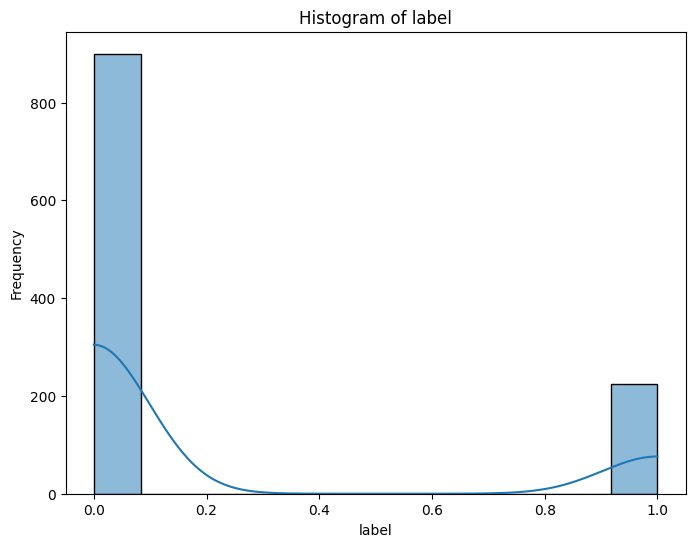

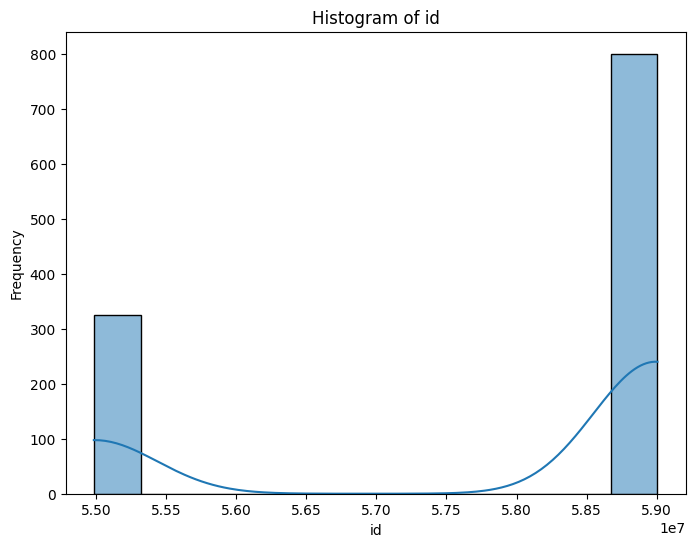

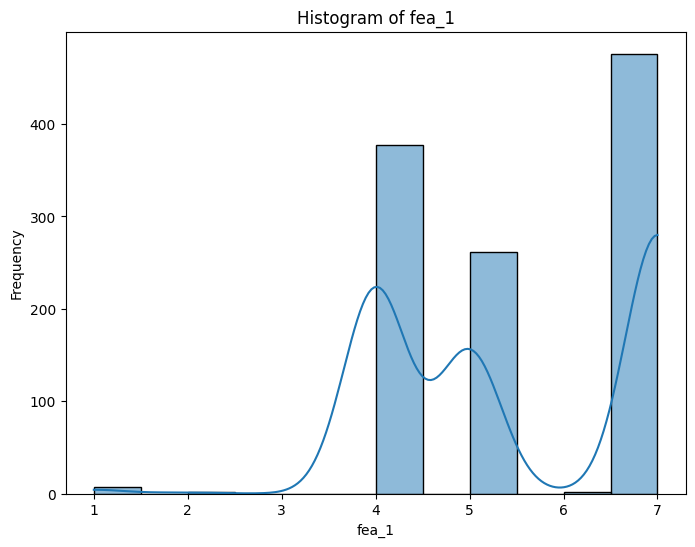

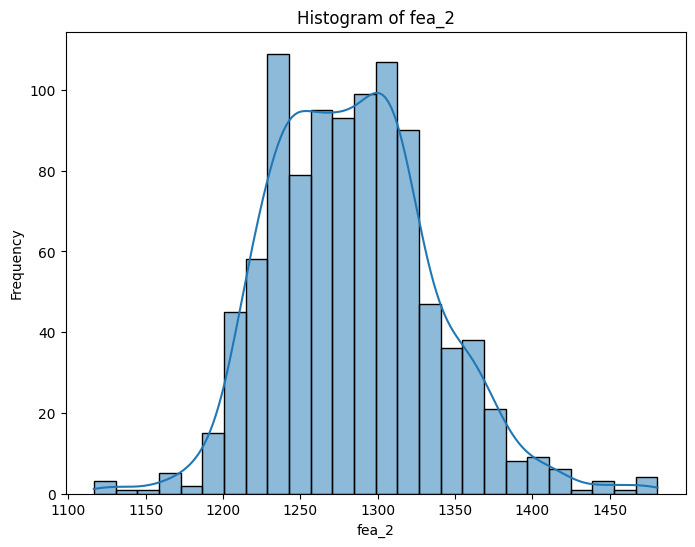

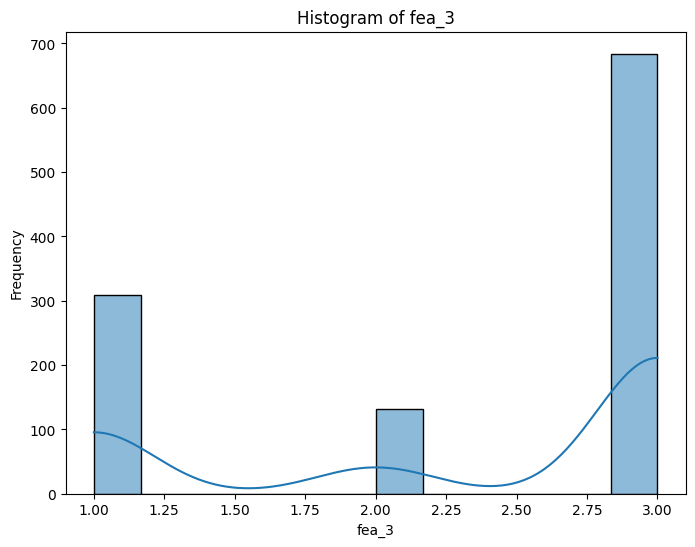

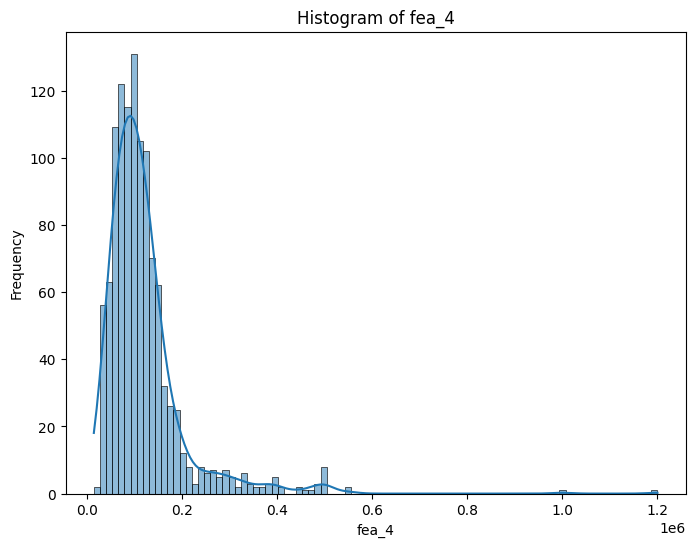

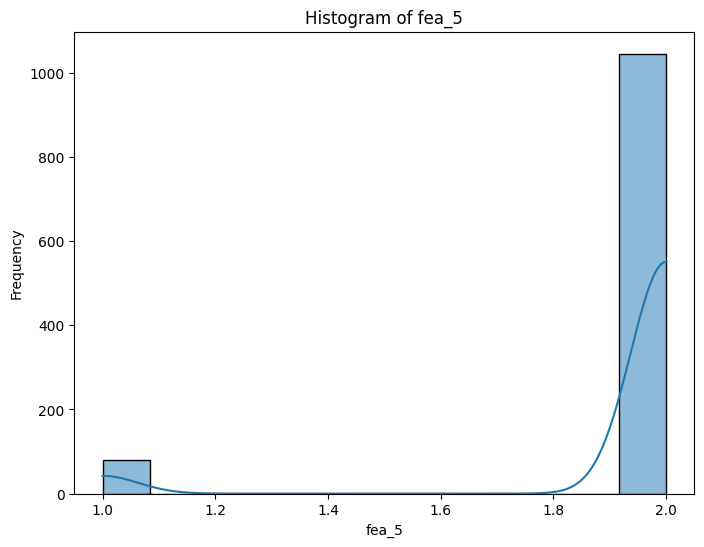

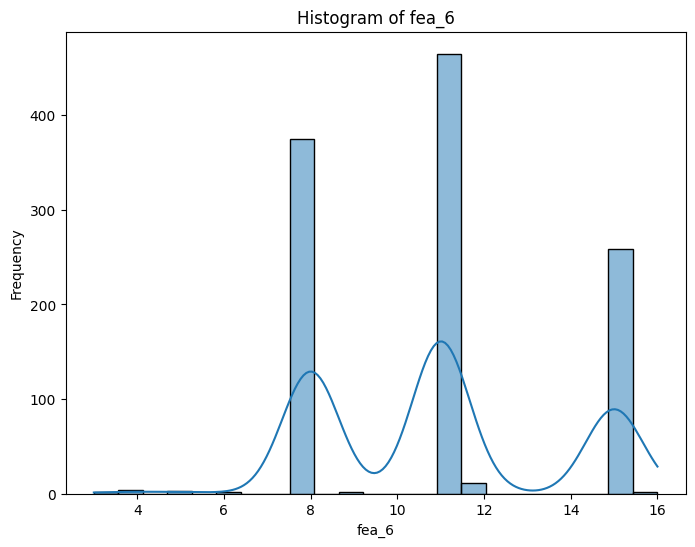

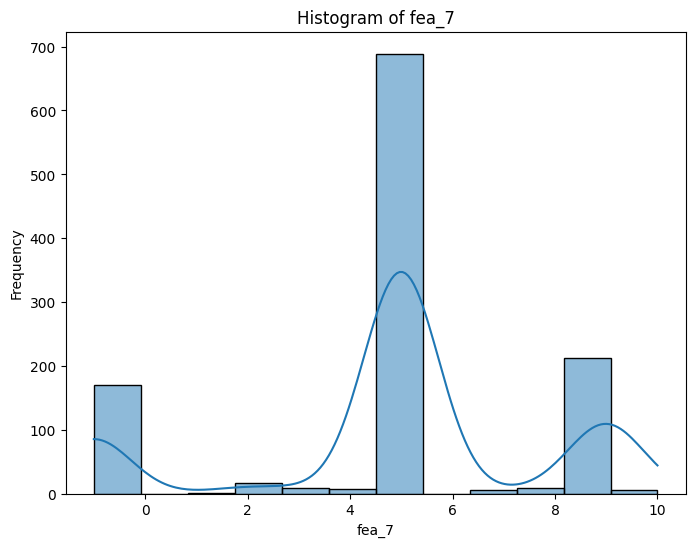

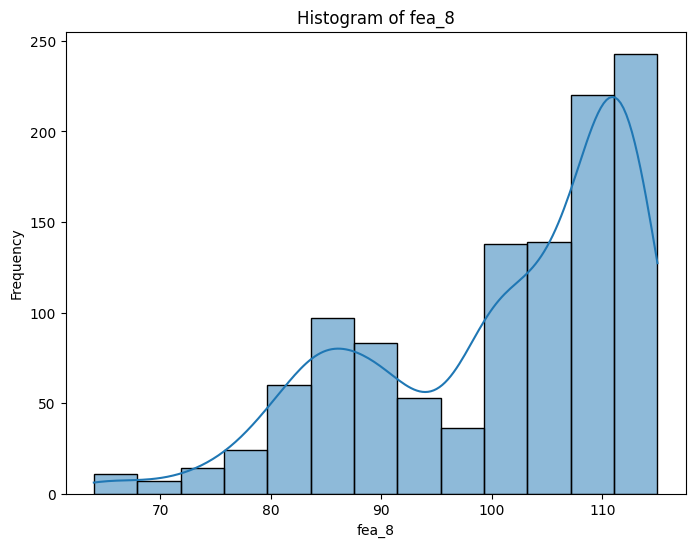

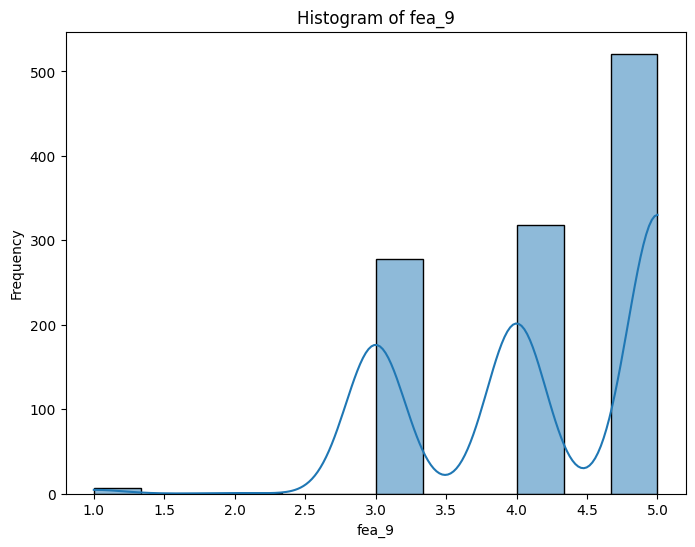

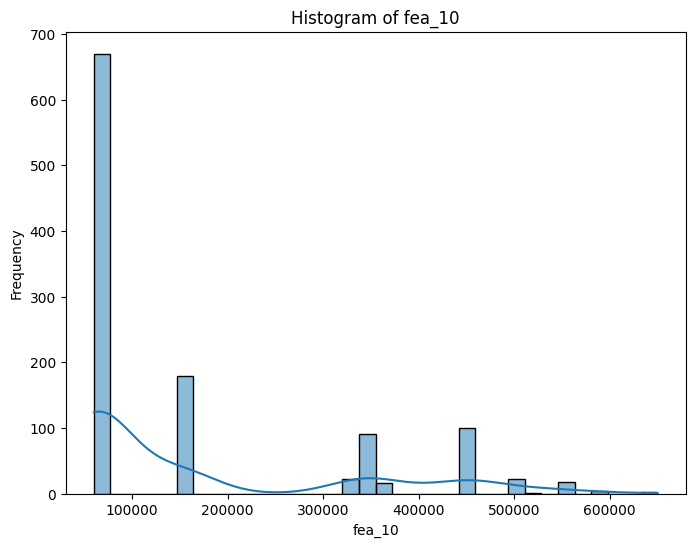

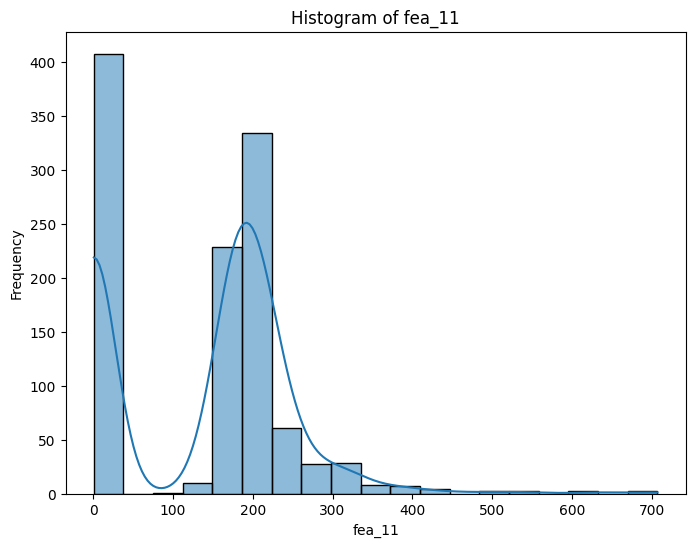

In [32]:
# histograms for numerical columns
numerical_cols = data.select_dtypes(include=np.number).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

1. **Label**:
\
The label distribution shows significant imbalance, with a much higher number of 0s compared to 1s (roughly 2:1 ratio). Most samples belong to class 0, indicating that the dataset is skewed toward the negative class.
2. **fea_1:**
\
The feature fea_1 contains discrete values from 1 to 7, with the distribution centered around 5 and showing a slight left skew.

3. **fea_2:**
\
The feature fea_2 contains continuous values ranging from approximately 1100 to 1500. The distribution is close to normal with a slight right skew, and imputed missing values are visible around the median.
4. **fea_3:**
\
The feature fea_3 contains discrete values of 1, 2, and 3, with the majority of samples concentrated at 3 and very few at 1, indicating a heavily skewed distribution.

5. **fea_4:**
\
The feature fea_4 spans a wide continuous range from 30,000 to 1,000,000, showing a highly right-skewed distribution with most values below 200,000.
6. **fea_5:**
\
The feature fea_5 is binary with values 1 and 2, where the majority of the samples are 2, making up around 80% of the data.
7. **fea_6:**
\
The feature fea_6 has discrete values from 3 to 15 and displays a bimodal distribution with noticeable peaks around 8 and 11.
8. **fea_7:**
\
The feature fea_7 has values ranging from -1 to 10, with an irregular distribution and distinct peaks at -1, 5, and 9.

9. **fea_8:**
\
The feature fea_8 has continuous values between 64 and 115, with an approximately normal distribution centered around 100 and a slight left skew.
10. **fea_9:**
\
The feature fea_9 contains discrete values from 1 to 5, showing a U-shaped distribution with peaks at 3 and 5 and fewer observations at 2 and 4.
11. **fea_10:**
\
The feature fea_10 has a wide continuous range from 1 to 650,018, with a strong right skew where most values are concentrated under 100,000.
12. **fea_11:**
\
The feature fea_11 contains continuous values from 1 to approximately 700, displaying a right-skewed distribution with distinct peaks at 1 and around 200.


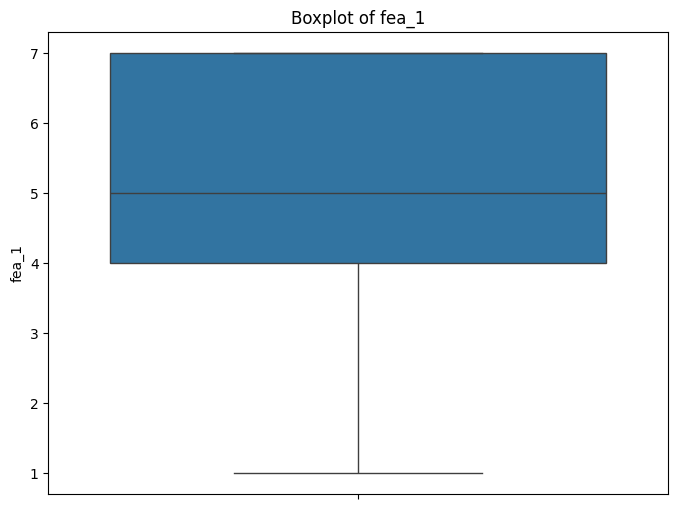

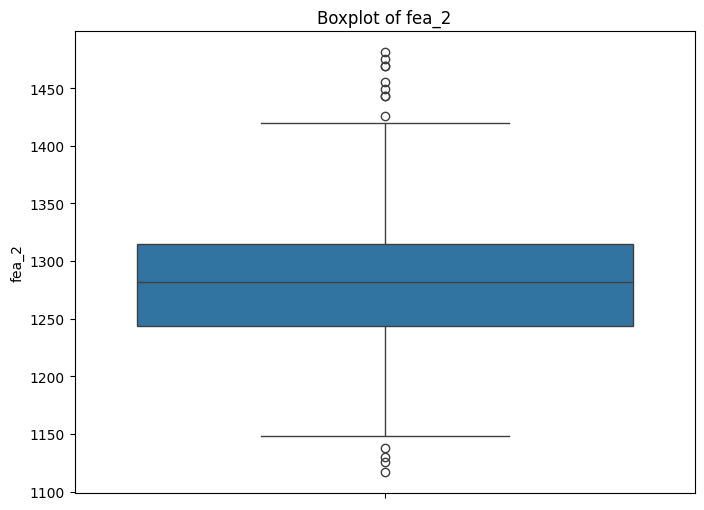

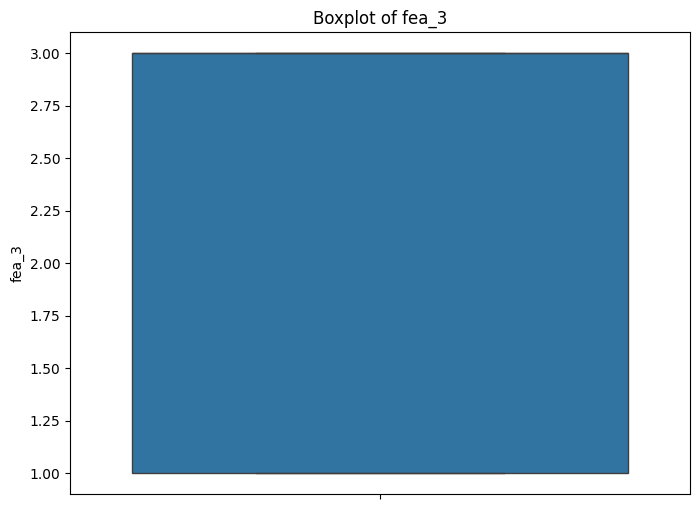

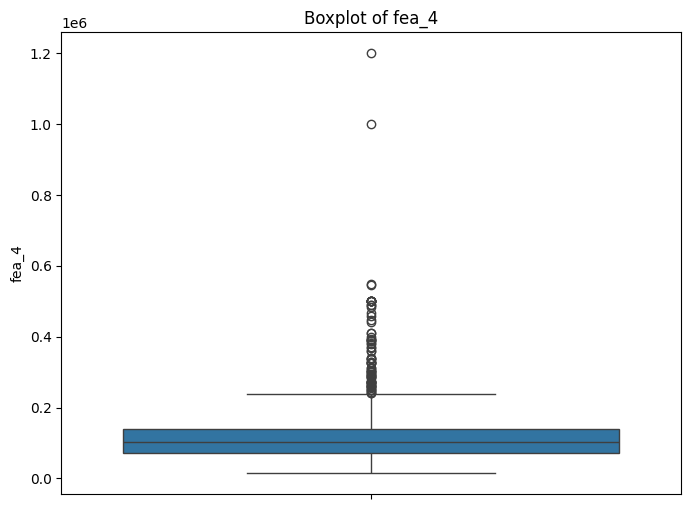

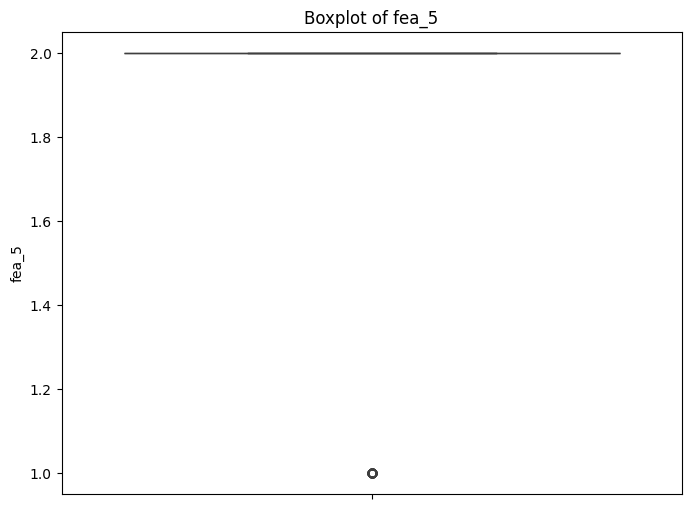

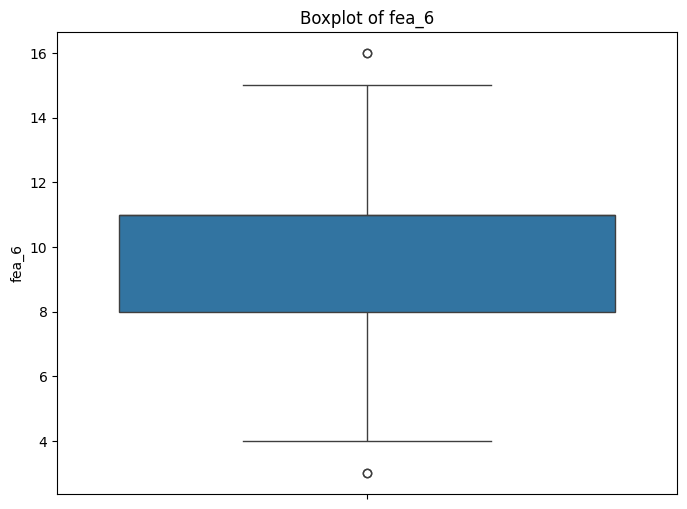

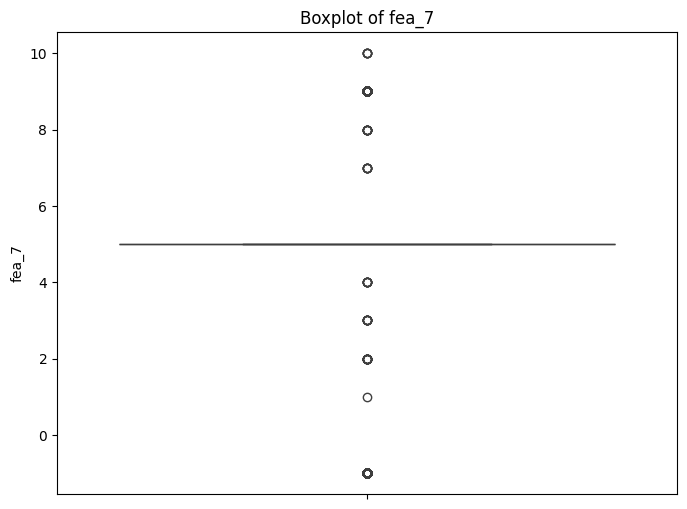

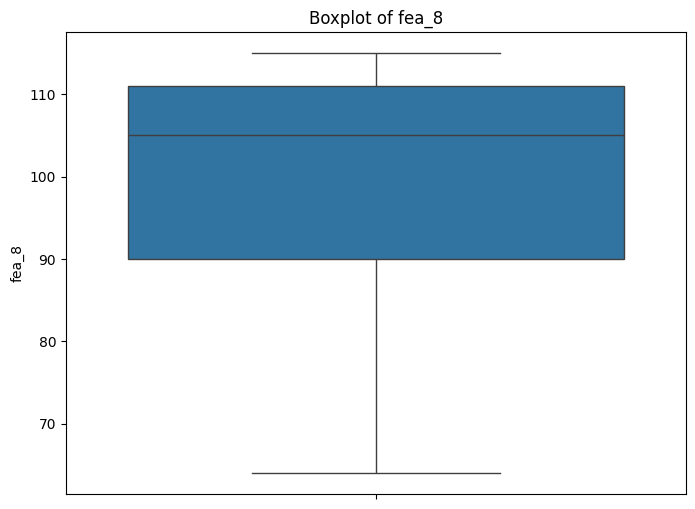

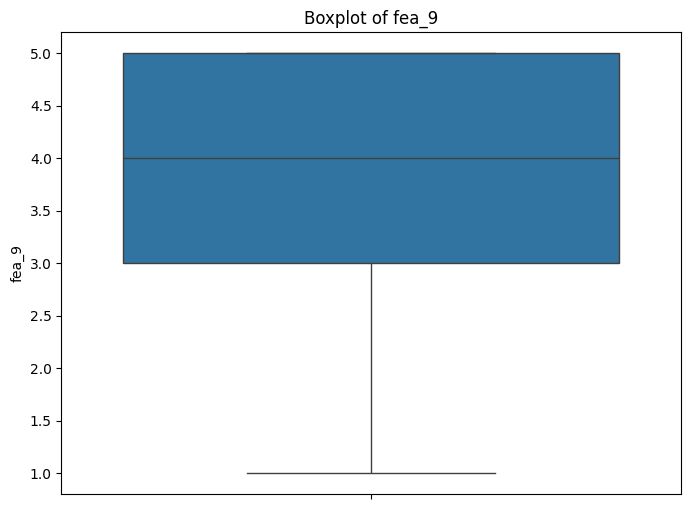

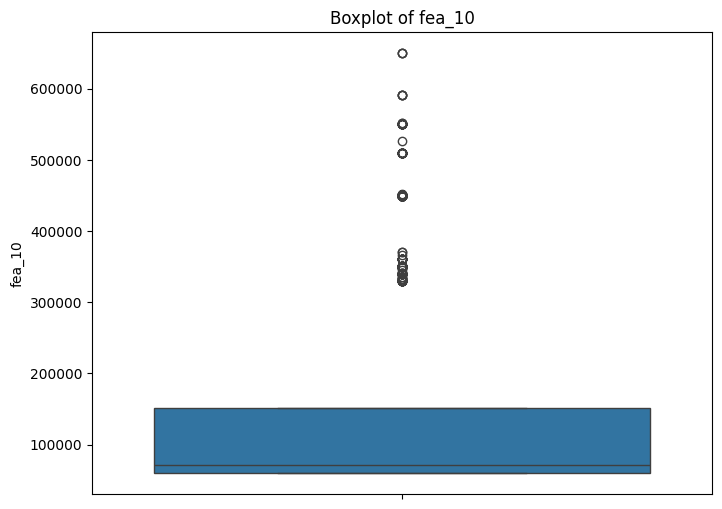

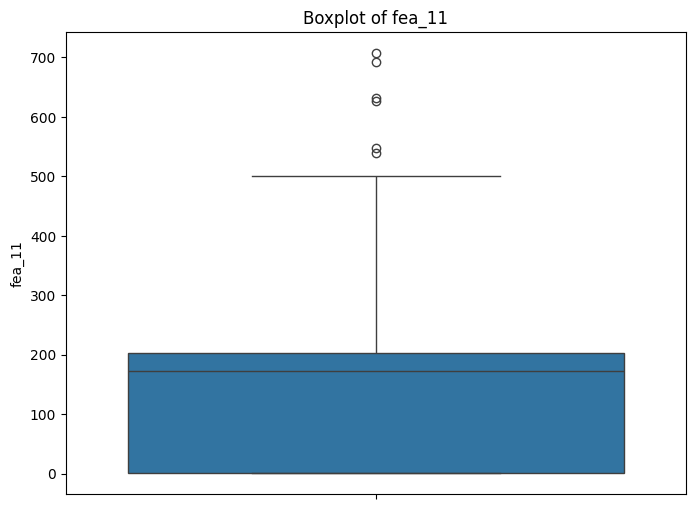

In [33]:
# boxplots for numerical columns
numerical_cols = data.select_dtypes(include=np.number).columns
numerical_cols = numerical_cols.drop(['label', 'id'])
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

In [34]:
#Fixing the outliers for coloumns with continous data
def fix_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound),
                         df[column].median(), df[column])
    return df

# Apply the function to the specified columns
for col in ['fea_2', 'fea_4', 'fea_10', 'fea_11']:
    data = fix_outliers(data, col)

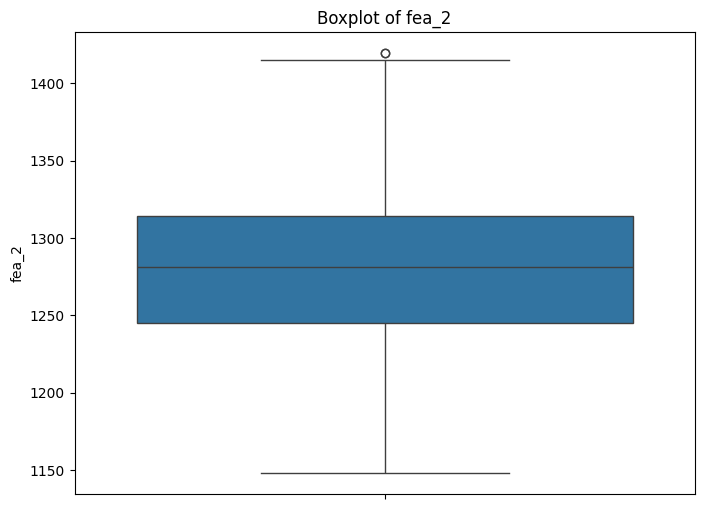

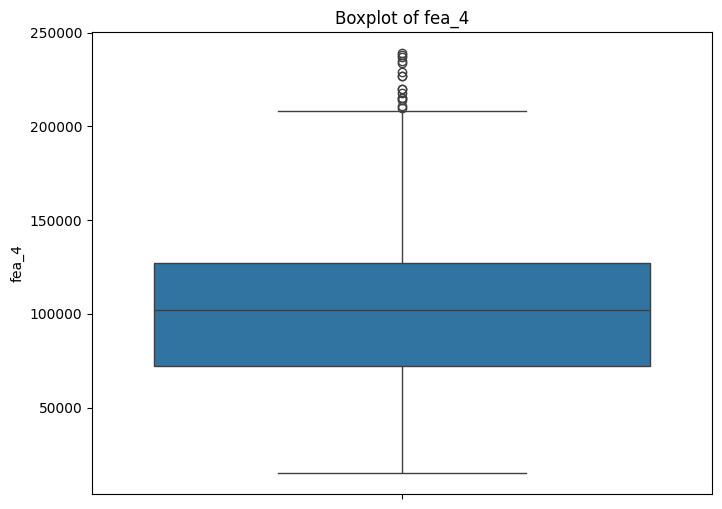

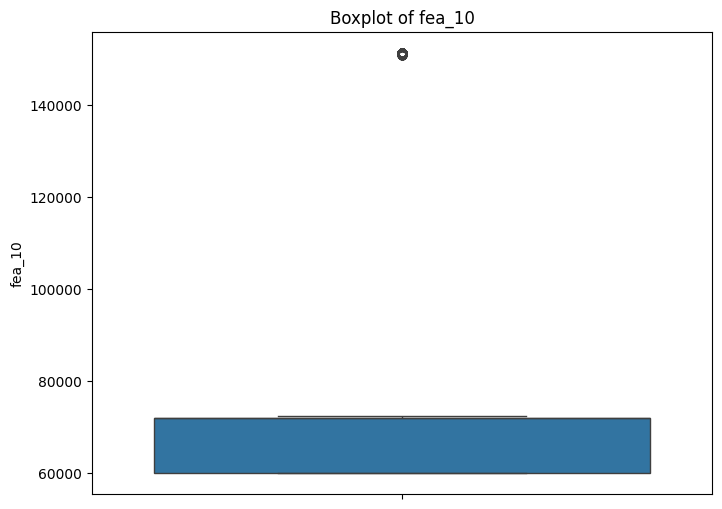

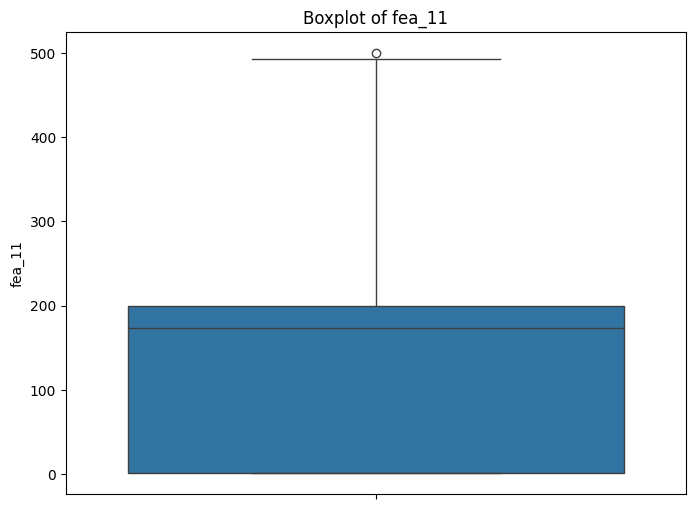

In [35]:
# Plotting boxplots for each column
for col in ['fea_2', 'fea_4', 'fea_10', 'fea_11']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

➡ Most outliers are fixed but still few outliers can be seen this might be due to skewness so using log fn this can be reduced.

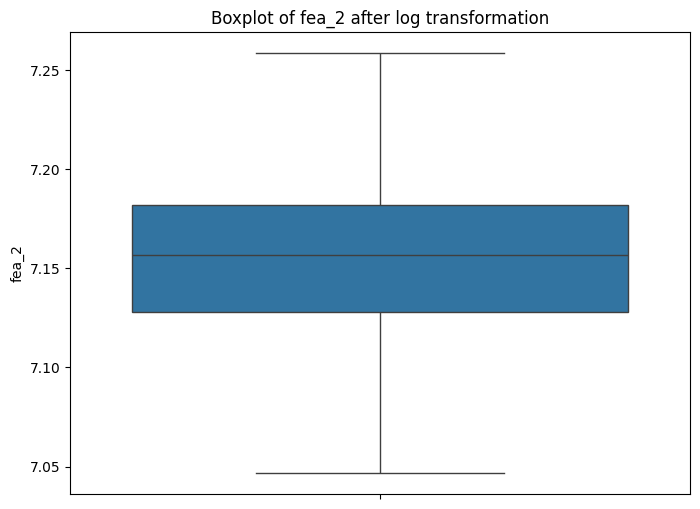

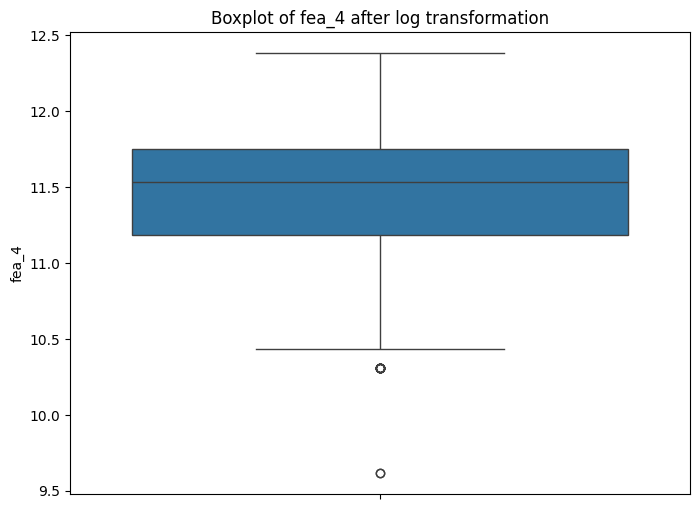

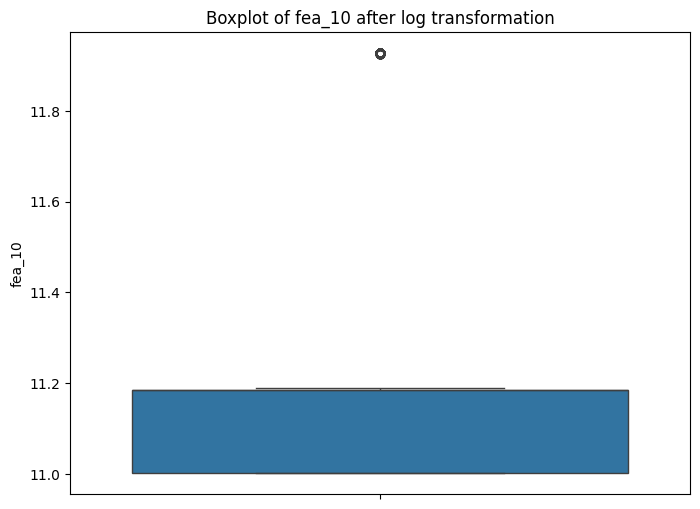

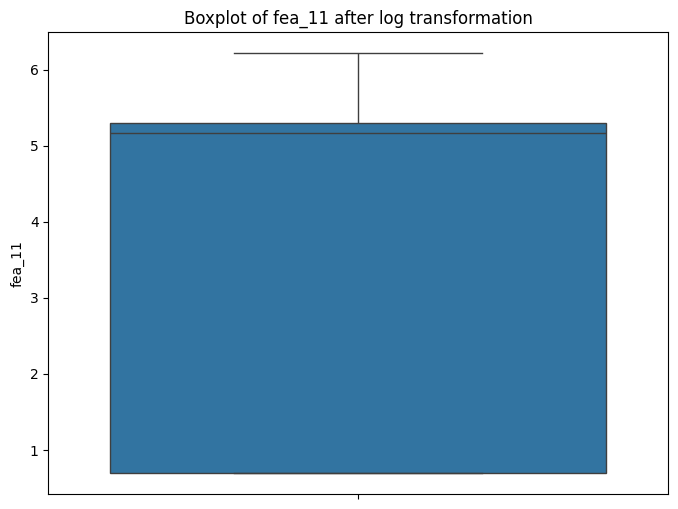

In [36]:
# Userdefine function for log
def fix_outliers_log(df, column):
    # Apply log transformation
    df[column] = np.log1p(df[column])
    return df

# Apply the log transformation to the specified columns
for col in ['fea_2', 'fea_4', 'fea_10', 'fea_11']:
    data = fix_outliers_log(data, col)

# Plotting boxplots for each column after log transformation
for col in ['fea_2', 'fea_4', 'fea_10', 'fea_11']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col} after log transformation')
    plt.ylabel(col)
    plt.show()

➡ Most of the outliers are fixed now

In [37]:
# Fill null values in 'fea_2' with the median
data['fea_2'].fillna(data['fea_2'].median(), inplace=True)

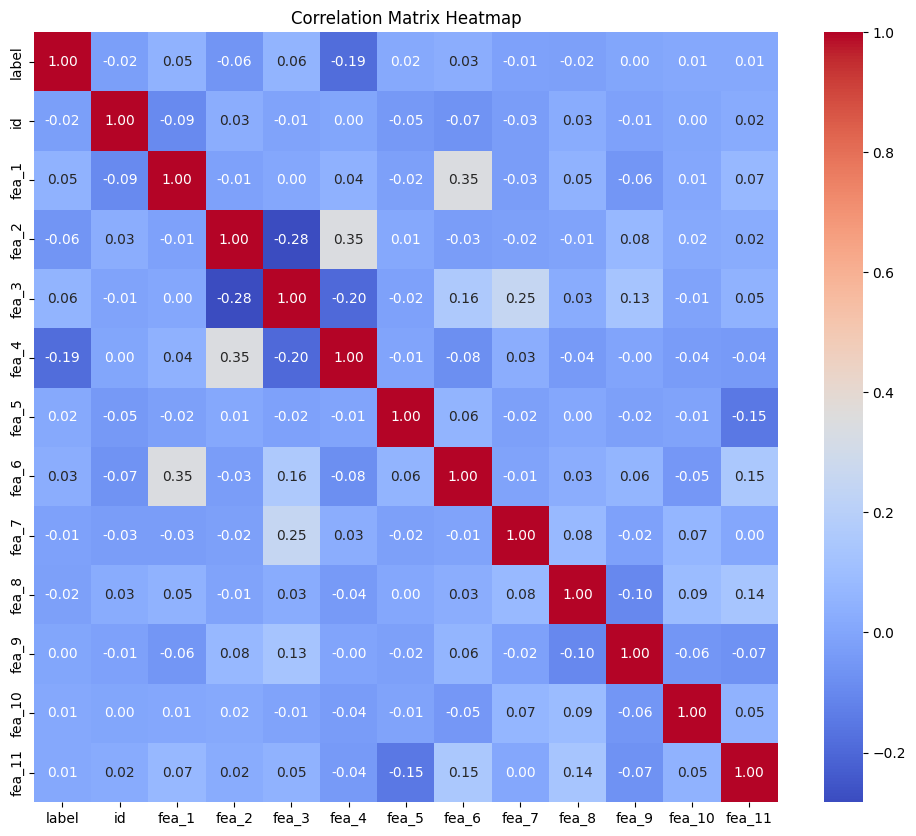

In [38]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


1. Target Variable (label):
 * shows very weak correlations with all features (absolute values ≤ 0.19).
 * The strongest (though still weak) correlation is with fea_4 (-0.19), suggesting a slight negative linear relationship.

2. Key Feature Relationships:

 * fea_2 and fea_4 remain moderately correlated (0.35).

 * fea_3 and fea_2 have a negative correlation (-0.28), as do fea_3 and fea_4 (-0.20).

 * fea_6 and fea_1 still show a notable correlation (0.35).

 * fea_7 and fea_3 are positively correlated (0.25).

3. Other Observations:

 * fea_5 and fea_11 show slight negative correlations with label (-0.02 and -0.15, respectively).

 * fea_8 and fea_11 have a mild positive correlation (0.14).

In [39]:
#Print the shape of dataset
data.shape

(1125, 13)

In [40]:
# Split into features and target
X = data.drop(['label', 'id'], axis=1)  # Dropping ID as it's not a predictive feature
y = data['label']

In [41]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Check class distribution
print("Training set class distribution:")
print(y_train.value_counts())
print("\nTest set class distribution:")
print(y_test.value_counts())

Training set class distribution:
label
0    630
1    157
Name: count, dtype: int64

Test set class distribution:
label
0    270
1     68
Name: count, dtype: int64


1. The data was split into training (787 samples) and testing (338 samples) sets

2. Stratified sampling ensured the class distribution was maintained in both sets

3. The ID column was dropped as it's not a meaningful feature for prediction

➡ Random Forest algorithms typically don't require feature scaling (normalization or standardization) for several fundamental reasons:

1. Nature of Decision Trees
Random Forests are ensembles of decision trees, and decision trees have properties that make scaling unnecessary:

 * Splitting based on values: Decision trees make splits by comparing feature values to thresholds, not by calculating distances

 * Order preservation: Scaling maintains the order of values, so splits would be identical before and after scaling

 * No distance calculations: Unlike algorithms like KNN or SVM, trees don't use Euclidean distance or other distance metrics

In [42]:
# Balanced Random Forest
rf_balanced = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_balanced.fit(X_train, y_train)

# Predictions
y_pred_bal = rf_balanced.predict(X_test)

# Evaluation
print("Balanced Model Performance:")
print(classification_report(y_test, y_pred_bal))
print(f"Accuracy: {accuracy_score(y_test, y_pred_bal):.4f}")

Balanced Model Performance:
              precision    recall  f1-score   support

           0       0.80      0.98      0.88       270
           1       0.29      0.03      0.05        68

    accuracy                           0.79       338
   macro avg       0.54      0.51      0.47       338
weighted avg       0.70      0.79      0.72       338

Accuracy: 0.7899


1. class_weight='balanced' is given because we can observe most of the target variable has datapoints beloging to class 0 (80%). So inorder to remove the biasing towards class 0  we  give classweight has balanced

1. Metrics/performance:
- Accuracy (79%): Looks high but misleading due to class imbalance.
- Minority Class (Class 1):
  - Precision: 29% → Most positive predictions are wrong.
  - Recall: 3% → Model misses 97% of actual positives.
  - F1-Score: 5% → Very poor for minority detection.
- Majority Class (Class 0):
  - High recall (98%) but lower precision (80%).
2. Key Problems

- Bias Toward Majority Class: Ignores Class 1 almost entirely.
- Fails Critical Tasks: Useless if Class 1 is important (fraud, disease).
- Macro Avg (51%): Overall poor balance across classes.
- Severe Class Imbalance (80-20 split).
- Poor Handling of Imbalance: Stratification/class weights weren’t enough.
3. Conclusion
- Eventhough class weight is balanced it's still observed the model is biased towards class 0. So we try resampling the data using smote technique

In [51]:
print('Training Accuracy :', np.round(metrics.accuracy_score(y_train, rf_balanced.predict(X_train)),3))
print('Training Precision :', np.round(metrics.precision_score(y_train, rf_balanced.predict(X_train), average='weighted'),3))
print('Training Recall :' , np.round(metrics.recall_score(y_train, rf_balanced.predict(X_train), average='weighted'),3))
print('Training F1 Score :' , np.round(metrics.f1_score(y_train, rf_balanced.predict(X_train), average='weighted'),3))
print('\nTesting Accuracy :' ,  np.round(metrics.accuracy_score(y_test, y_pred_bal),3))
print('Testing Precision :' , np.round(metrics.precision_score(y_test, y_pred_bal, average='weighted'),3))
print('Testing Recall :' , np.round(metrics.recall_score(y_test, y_pred_bal, average='weighted'),3))
print('Testing F1 Score :' , np.round(metrics.f1_score(y_test, y_pred_bal, average='weighted'),3))

Training Accuracy : 1.0
Training Precision : 1.0
Training Recall : 1.0
Training F1 Score : 1.0

Testing Accuracy : 0.79
Testing Precision : 0.697
Testing Recall : 0.79
Testing F1 Score : 0.715


➡ We can see there is huge difference in training and testing accuracy ~ 21% which indicates the model is overfitting

In [43]:
# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after resampling
print("Training set class distribution after SMOTE:")
print(y_train_resampled.value_counts())


Training set class distribution after SMOTE:
label
0    630
1    630
Name: count, dtype: int64


# smote

SMOTE (Synthetic Minority Over-sampling Technique) is a technique used to address class imbalance in datasets.  It works by creating synthetic samples of the minority class, rather than simply duplicating existing ones.  This helps to balance the class distribution without introducing bias from over-representation of existing minority class examples.  It does this by selecting a minority class instance and finding its k-nearest neighbors (also from the minority class).  New synthetic instances are then created along the line segments connecting these instances.  This generates new data points that are similar to the existing minority class examples but not identical, effectively increasing the size of the minority class and improving model performance.


Baseline Model Performance:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       270
           1       0.37      0.26      0.31        68

    accuracy                           0.76       338
   macro avg       0.60      0.57      0.58       338
weighted avg       0.73      0.76      0.74       338

Accuracy: 0.7604


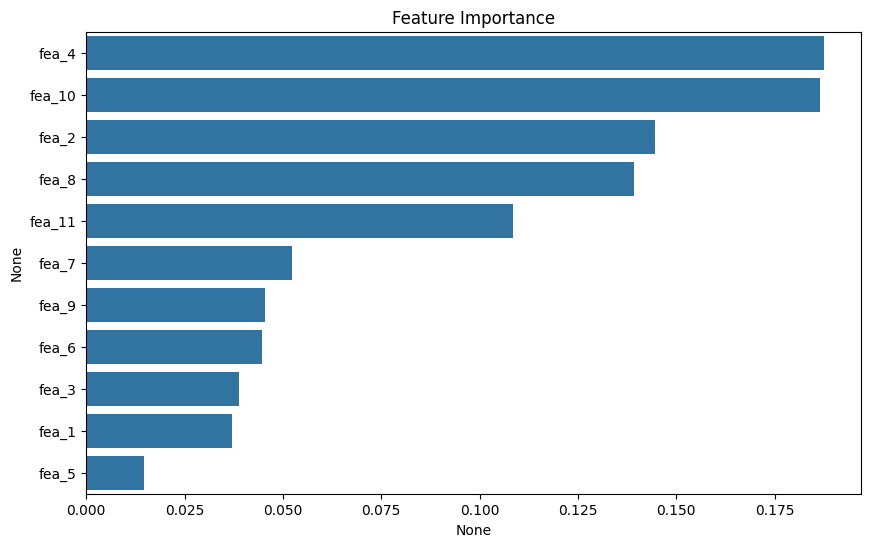

In [54]:
# Initialize and train baseline model
rf_resampled = RandomForestClassifier(random_state=42)
rf_resampled.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = rf_resampled.predict(X_test)

# Evaluation
print("Baseline Model Performance:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Feature importance
feature_imp = pd.Series(rf_resampled.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title('Feature Importance')
plt.show()

Inference:
1. The resampled model achieved 76% accuracy

2. Better performance on class 0 (precision 0.37, recall 0.26) than class 1 (precision 0.83, recall 0.89)

3. Feature importance shows 'fea_4', fea_8, 'fea_10', and 'fea_2' as most important features.



In [56]:
#Print testing and training metrics
print('Training Accuracy :', np.round(metrics.accuracy_score(y_train_resampled, rf_resampled.predict(X_train_resampled)),3))
print('Training Precision :', np.round(metrics.precision_score(y_train_resampled, rf_resampled.predict(X_train_resampled), average='weighted'),3))
print('Training Recall :' , np.round(metrics.recall_score(y_train_resampled, rf_resampled.predict(X_train_resampled), average='weighted'),3))
print('Training F1 Score :' , np.round(metrics.f1_score(y_train_resampled, rf_resampled.predict(X_train_resampled), average='weighted'),3))
print('\nTesting Accuracy :' ,  np.round(metrics.accuracy_score(y_test, y_pred),3))
print('Testing Precision :' , np.round(metrics.precision_score(y_test, y_pred, average='weighted'),3))
print('Testing Recall :' , np.round(metrics.recall_score(y_test, y_pred, average='weighted'),3))
print('Testing F1 Score :' , np.round(metrics.f1_score(y_test, y_pred, average='weighted'),3))

Training Accuracy : 1.0
Training Precision : 1.0
Training Recall : 1.0
Training F1 Score : 1.0

Testing Accuracy : 0.76
Testing Precision : 0.735
Testing Recall : 0.76
Testing F1 Score : 0.745


➡ After resampling , The precision and recall for
  * class 0( precision: 0.83 , recall: 0.89 )
  * class 1(precision: 0.37 , recall: 0.26 )

➡ Although the diff in precision and recall between class 0 and class 1 is not huge but there is a huge increase in them compared to the balanced (class weight = balanced) model.

➡ But the overall testing accuracy and recall seems to have decrease by 2% from 79% to 76% whereas, there is an increase in precision from 69% to 73.5% but still our priority should be recall as we don't want any false negative cases (type 2 ) error

In [47]:
# Parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None]
}

# Grid search
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='balanced_accuracy',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Optimized model
rf_optimized = grid_search.best_estimator_
y_pred_opt = rf_optimized.predict(X_test)

# Evaluation
print("\nOptimized Model Performance:")
print(classification_report(y_test, y_pred_opt))
print(f"Accuracy: {accuracy_score(y_test, y_pred_opt):.4f}")

Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}

Optimized Model Performance:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       270
           1       0.37      0.25      0.30        68

    accuracy                           0.76       338
   macro avg       0.60      0.57      0.58       338
weighted avg       0.73      0.76      0.75       338

Accuracy: 0.7633


In [57]:
#Print testing and training metrics for optimized model
print('Training Accuracy :', np.round(metrics.accuracy_score(y_train, rf_optimized.predict(X_train)),3))
print('Training Precision :', np.round(metrics.precision_score(y_train, rf_optimized.predict(X_train), average='weighted'),3))
print('Training Recall :' , np.round(metrics.recall_score(y_train, rf_optimized.predict(X_train), average='weighted'),3))
print('Training F1 Score :' , np.round(metrics.f1_score(y_train, rf_optimized.predict(X_train), average='weighted'),3))
print('\nTesting Accuracy :' ,  np.round(metrics.accuracy_score(y_test, y_pred_opt),3))
print('Testing Precision :' , np.round(metrics.precision_score(y_test, y_pred_opt, average='weighted'),3))
print('Testing Recall :' , np.round(metrics.recall_score(y_test, y_pred_opt, average='weighted'),3))
print('Testing F1 Score :' , np.round(metrics.f1_score(y_test, y_pred_opt, average='weighted'),3))

Training Accuracy : 0.938
Training Precision : 0.939
Training Recall : 0.938
Training F1 Score : 0.938

Testing Accuracy : 0.763
Testing Precision : 0.734
Testing Recall : 0.763
Testing F1 Score : 0.745


➡ For the optimized model with these Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}, we can still observe the difference between training and testing accuracy which still suggests overfitting model

➡ And there seems to be a decrease in precision for class 1 from 26% to 25%. But the overall recall seems to have not changed


##**Conclusion**:
1. Overall the resampled model seems to give better results compared to balanced and optimized model since the recall for class 1 is more in resampled model
2. But if the priority is class 0  and class 1 i.e we can afford to have some false negative cases for class 1 we could go for balanced model since it gives more overall testing accuracy and recall 79%



# 🌳🌳 What is a Random Forest?

A **Random Forest** is an ensemble machine learning method that builds multiple decision trees and combines their outputs to improve predictive performance and stability. It works by:

- **Training multiple decision trees** on different random subsets of the data
- **Averaging** the results (for regression) or using **majority vote** (for classification)

Random Forest reduces overfitting and increases accuracy compared to a single decision tree.

---

## 📌 When to Use Random Forest

- When you need a **powerful, general-purpose** model  
- For **both classification and regression** tasks  
- When your data has **many features** or **noisy labels**  
- To **estimate feature importance** robustly  
- When **overfitting** is a concern with single models  

---

## 🧠 Key Assumptions

- Trees in the forest are **weakly correlated**  
- **Bootstrap samples** (random sampling with replacement) are representative  
- Each tree has **high variance, low bias**, but averaging reduces variance  
- Features are **randomly selected** at each split to ensure diversity  

---

## ✅ Advantages

- **High accuracy** (better than individual decision trees)  
- **Resistant to overfitting**  
- Handles **large datasets** and **high-dimensional spaces**  
- **Works well** with missing or unbalanced data  
- Provides **feature importance rankings**  
- **Versatile** for many types of tasks  

---

## ⚠️ Disadvantages

- **Less interpretable** than a single decision tree  
- **Slower** and **more resource-intensive** (many trees to train/predict)  
- Can be **biased toward dominant classes** if data is imbalanced  
- **Harder to tune** (e.g., number of trees, max depth, features per split)  
- Not ideal when you need a **simple, explainable model**

---
